In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import models, data_reader, utils

%matplotlib inline

image_folder = 'data/images/'
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

/home/ubuntu/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/.pyenv/versions/3.7.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/.pyenv/versions/3.7.7/lib/python3

scab


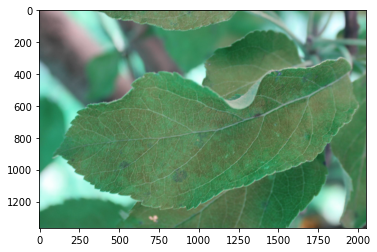

In [2]:
row = train_data.sample(1).iloc[0,:]
for c in row.iteritems():
    if c[1] == 1:
        print(c[0])
img = cv2.imread(f"data/images/{row['image_id']}.jpg")
plt.imshow(img)

In [5]:
train_generator, validation_generator = data_reader.get_generators(64)
model = models.get_model('inceptionv3')
callbacks = utils.get_callbacks('inceptionv3')

Found 1639 validated image filenames belonging to 4 classes.
Found 182 validated image filenames belonging to 4 classes.


In [ ]:
# train the model on the new data for a few epochs
history = model.fit_generator(generator=train_generator,
                   validation_data=validation_generator,
                   epochs=5,
                   shuffle=True,
                   use_multiprocessing=False,
                   verbose=1,
                   callbacks=callbacks)

Epoch 1/5
26/26 [==============================] - 115s 4s/step - loss: 2.8722 - acc: 0.4271 - val_loss: 2.4643 - val_acc: 0.3516
Epoch 2/5
26/26 [==============================] - 53s 2s/step - loss: 1.1862 - acc: 0.5314 - val_loss: 1.7459 - val_acc: 0.4396
Epoch 3/5
26/26 [==============================] - 73s 3s/step - loss: 0.9967 - acc: 0.6248 - val_loss: 3.3519 - val_acc: 0.4066
Epoch 4/5
26/26 [==============================] - 76s 3s/step - loss: 1.0101 - acc: 0.6089 - val_loss: 1.5190 - val_acc: 0.4396
Epoch 5/5
20/26 [======================>.......] - ETA: 14s - loss: 0.8466 - acc: 0.6916

In [5]:
import tensorflow as tf

In [6]:
tf.__version__

'1.14.0'

In [7]:
tf.test.is_gpu_available()

True

In [8]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


### Tensorflow==2.1.0

In [7]:
tf.config.list_physical_devices('GPU') 

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]